In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import preprocessing
from collections import defaultdict

import pandas as pd
import numpy as np
import graphviz

data = pd.read_csv('dataset//CreditSample.txt', sep="\t", header=0)
data

,Код,№ Паспорта,ФИО,Адрес,"Размер ссуды, руб","Срок ссуды, мес",Цель ссуды,"Среднемесячный доход, руб","Среднемесячный расход, руб",Основное направление расходов,...,"Срок работы на данном предприятии, лет",Направление деятельности заемщика,"Срок работы на данном направлении, лет",Пол,Семейное положение,Количество лет,Количество иждивенцев,"Срок проживания в данной местности, лет",Обеспеченность займа,Давать кредит
0,1,0936-866096,1,1,10000,12,Покупка товара,4500,3000,Покупка товаров длит. пользования,...,6,Реклама и маркетинг,8,Жен,Да,41,3,24,ИСТИНА,ИСТИНА
1,2,8355-512943,1,1,14000,12,Оплата за образование,8500,3000,Покупка и ремонт недвижимости,...,10,Адм.-хоз. и транспортная службы,12,Жен,Нет,26,0,20,ИСТИНА,ИСТИНА
2,3,8017-098471,1,1,25000,18,Оплата за образование,7000,4000,Затраты на образование (в т.ч. детей),...,8,Участие в основной деятельности,8,Жен,Да,32,3,13,ИСТИНА,ИСТИНА
3,4,2762-945535,1,1,64000,48,Покупка и ремонт недвижимости,7000,5000,Покупка товаров длит. пользования,...,9,Участие в основной деятельности,11,Муж,Нет,50,2,22,ИСТИНА,ИСТИНА
4,5,0459-997701,1,1,3500,6,Покупка товара,3000,1500,"Содержание/аренда недвижимости, а/т",...,7,Участие в основной деятельности,8,Муж,Да,30,0,14,ИСТИНА,ЛОЖЬ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,7347-003368,1,1,17500,18,Оплата за образование,5500,3500,"Мобильная связь, Интернет",...,2,Служба безопасности,3,Жен,Да,26,1,11,ИСТИНА,ИСТИНА
145,146,8594-049433,1,1,21000,12,Покупка товара,13000,6500,"Одежда, продукты питания и т.п.",...,4,Юридическая служба,7,Жен,Да,51,3,37,ИСТИНА,ИСТИНА
146,147,6405-346060,1,1,4000,6,"Турпоездки, развлечения и т.п.",4000,2000,Покупка и ремонт недвижимости,...,10,Участие в основной деятельности,11,Жен,Да,69,3,44,ИСТИНА,ИСТИНА
147,148,5674-386161,1,1,19500,12,Покупка и ремонт недвижимости,8500,4000,Покупка товаров длит. пользования,...,5,Участие в основной деятельности,5,Муж,Да,38,3,11,ИСТИНА,ИСТИНА


[1.         0.9        0.8        0.8        0.9        0.9
 0.9        1.         0.9        1.         0.9        0.9
 1.         0.8        0.55555556]
Accuracy: 0.88 (+/- 0.22)


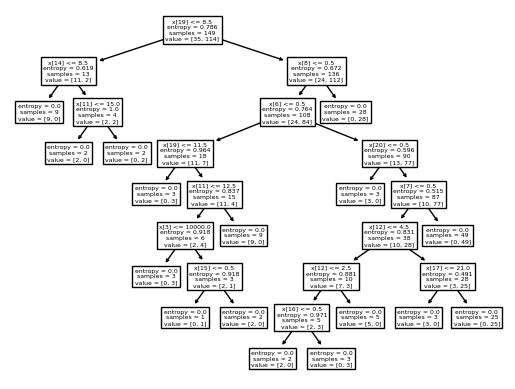

In [2]:
data = data.replace('Да', 1)
data = data.replace('ИСТИНА', 1)
data = data.replace('Нет', 0)
data = data.replace('ЛОЖЬ', 0)

X = data.iloc[:, 4:25]
Y = data.iloc[:, 25:]
d = defaultdict(preprocessing.LabelEncoder)

to_convert = ['Цель ссуды', 'Основное направление расходов', 'Отраслевая принадлежность предприятия', 'Направление деятельности заемщика', 'Пол']

fit_x = X.apply(lambda x: d[x.name].fit_transform(x) if x.name in to_convert else X[x.name])
fit_y = Y.apply(lambda x: d[x.name].fit_transform(x))

clf = tree.DecisionTreeClassifier(random_state=7775, max_depth=8, criterion='entropy', splitter='best')
clf = clf.fit(fit_x, fit_y)
tree.plot_tree(clf)

cvs = cross_val_score(clf, fit_x, fit_y, cv=15)
print(cvs)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvs.mean(), cvs.std() * 2))


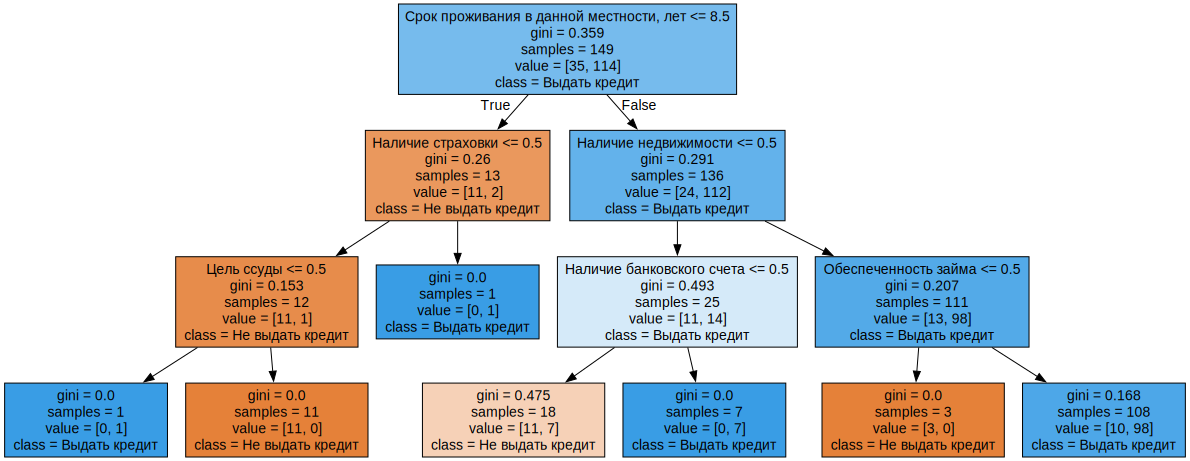

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,
                                class_names=["Не выдать кредит", "Выдать кредит"],
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render("test1")
graph